# GA Based DG to Facility Assignment Optimization Tests

In [1]:
from _products.visualization_tools import *
from _products.utility_fnc import blocking_sound_player as bsp, error_sounds as err_snd, Alert_sounds as alrt_snd
from _LearningMachines._BIO._GA.GA_TOOLS4 import *


# these need to be the paths to the data files for the various agents in the model
DG_FILES = r'DataFiles/dg.csv'
budget = r'DataFiles/budget.csv'
Distances = r'DataFiles/Distance of DG to Building .csv'
facilities = r'DataFiles/nodes.csv'

# store the scores for a given generational biase
hp_dict = {}

In [2]:
dum_l = [np.zeros(5)]

print(dum_l)
test_dmd = np.array([1, 3, 44, 5, 100])
dum_l[0][3] = 1

print(dum_l)

print(sum(dum_l[0]*test_dmd))

[array([0., 0., 0., 0., 0.])]
[array([0., 0., 0., 1., 0.])]
5.0


# total investment cost for a given solution: Must not exceed budget

![Investment cost Equation](_Media_/_INFORMATION/_IMG/eqn1.png)

In [3]:
 base_budgets = pd.DataFrame({
        'id': [1, 2, 3, 4],
        "budget": [1000000,5000000,10000000,15000000],
    })

sample_dg = pd.DataFrame({
    'id': [1, 2, 3, 4, 5],
    "cost":[5, 5, 1, 10, 2],
    "output":[230, 1222, 123, 300, 600],
    "opmain":[3, 10, 1, 5, 9], 
    "capacity": [300, 1222, 200, 400, 900]})

sample_node = pd.DataFrame({
    "demand":[5, 5, 1, 10, 2],
    "penalty":[230, 1222, 123, 300, 600],
    })

distances = [
    [2000, 100, 230, 3009, 1234],
    [123, 90, 234, 1233, 890],
    [122, 600, 789, 9009, 100],
    [1232, 45, 6790, 234, 7878],
    [1233, 456, 6768, 9088, 1230]]



chromo = np.array([0, 1, 1, 0, 1])

n_desired = 4
n_chrom = np.count_nonzero(chromo)

n_count_error = abs(n_desired - n_chrom)
print(n_chrom)
print(n_count_error)

inv_cost = sample_dg['cost'].values * sample_dg['output'].values
print("investment cost")
display(inv_cost)

print("dot")
print(np.dot(inv_cost, chromo.T))

3
1
investment cost


array([1150, 6110,  123, 3000, 1200], dtype=int64)

dot
7433


# Operation and Maintenance cost

![Operation and Maintenance cost](_Media_/_INFORMATION/_IMG/eqn2_ops_maint.png)
<br>
![Operation and Maintenance variables](_Media_/_INFORMATION/_IMG/opmaint_vars.png)

In [4]:
# base operation need to only get product for a node corresponding to assignement
# First do assignment loging which nodes go to which open DG
# the use logged assignments to calculte total demand for that node
#       1) keep assignments as a boolean list list as well
#             :-> dg_j == [0, 0, 0, 1,.......]
#                             0 = not assignmed
#                             1 = assigned

assignments = [False, False, True, False, True]
chh =[x==1 for x in chromo] 

print("chh")
print(chh)
a = sample_dg.loc[chh, 'opmain'].values

c = sample_node.loc[assignments, :]

b = sample_node.loc[assignments, :]['demand'].values
# select all DGs that are open using chromosome


print(a)
print(b)

# opmain_current_assign = a * b
# print(opmain_current_assign)
# total_opmain_out = np.dot(opmain_current_assign, chromo.T)
# print("Total operationcost")
# print(total_opmain_out)

chh
[False, True, True, False, True]
[10  1  9]
[1 2]


# Distance of distribution cost


![Distance cost](_Media_/_INFORMATION/_IMG/eqn_3distance.png)

# minimizes the total network power outage (unmet demand) during a large-scale grid disturbance:
![unmet demand](_Media_/_INFORMATION/_IMG/eqn4_unmetdamand.png)

# Below is just to have a look at some of the data from the dg file

#  mitigate the potential RPF issue by minimizing the amount of excess renewable penetration (RPF amounts) experienced within the network

In [5]:
DG_df = pd.read_csv(DG_FILES)

display(DG_df.head())

for v in DG_df.columns.tolist():
    print("'{}',".format(v))

,id,output,pos-x,pos-y,rated_power,investment_cost,o&m_cost,excess_penetration_cost_LOW,excess_penetration_cost_MEDIUM,excess_penetration_cost_HIGH
0,1.0,1351248.0,35.953747,-83.943975,5000000.0,1.36,0.041,0.68,1.36,2.04
1,2.0,1351248.0,35.967477,-83.937751,5000000.0,1.36,0.041,0.68,1.36,2.04
2,3.0,1351248.0,36.062503,-83.996649,5000000.0,1.36,0.041,0.68,1.36,2.04
3,4.0,1351248.0,35.975097,-83.936355,5000000.0,1.36,0.041,0.68,1.36,2.04
4,5.0,1351248.0,35.968580,-83.993414,5000000.0,1.36,0.041,0.68,1.36,2.04


'id',
'output',
'pos-x',
'pos-y',
'rated_power',
'investment_cost',
'o&m_cost',
'excess_penetration_cost_LOW',
'excess_penetration_cost_MEDIUM',
'excess_penetration_cost_HIGH',


In [6]:
DGdist_df = pd.read_csv(Distances)

display(DGdist_df.head())

for v in DGdist_df.columns.tolist():
    print("'{}',".format(v))

,demand_node,dg-1,dg-2,dg-3,dg-4,dg-5,dg-6,dg-7,dg-8,dg-9,...,dg-16,dg-17,dg-18,dg-19,dg-20,dg-21,dg-22,dg-23,dg-24,dg-25
0,demand-1,0.000,1.011,8.072,1.536,2.949,3.130,2.364,2.741,4.157,...,6.612,6.326,0.828,3.428,4.897,4.266,2.256,1.572,1.643,1.158
1,demand-2,1.011,0.000,7.346,0.532,3.114,2.270,1.358,1.939,3.945,...,7.154,6.001,0.184,3.943,4.470,3.298,1.664,1.005,1.252,0.813
2,demand-3,8.072,7.346,0.000,6.917,6.493,7.482,6.363,5.407,4.900,...,9.242,3.585,7.462,7.741,3.733,6.704,8.167,7.956,8.269,8.052
3,demand-4,1.536,0.532,6.917,0.000,3.223,1.967,0.829,1.528,3.826,...,7.389,5.787,0.710,4.200,4.220,2.853,1.648,1.131,1.437,1.137
4,demand-5,2.949,3.114,6.493,3.223,0.000,5.163,3.643,2.820,1.663,...,4.280,3.789,3.046,1.398,2.782,5.757,4.776,4.115,4.330,3.836


'demand_node',
'dg-1',
'dg-2',
'dg-3',
'dg-4',
'dg-5',
'dg-6',
'dg-7',
'dg-8',
'dg-9',
'dg-10',
'dg-11',
'dg-12',
'dg-13',
'dg-14',
'dg-15',
'dg-16',
'dg-17',
'dg-18',
'dg-19',
'dg-20',
'dg-21',
'dg-22',
'dg-23',
'dg-24',
'dg-25',


# Below is just to have a look at some of the data from the facility file

In [7]:
display(pd.read_csv(facilities))

,id,demand,penalty,pos-x,pos-y
0,1,495434,10,35.953747,-83.943975
1,2,495434,10,35.967477,-83.937751
2,3,495434,10,36.062503,-83.996649
3,4,495434,10,35.975097,-83.936355
4,5,495434,10,35.968580,-83.993414
5,6,18031,5,35.984883,-83.903327
6,7,18031,5,35.986606,-83.932197
7,8,18031,5,35.992759,-83.952804
8,9,18031,5,35.991716,-84.001613
9,10,18031,5,35.935312,-83.869820


# Budget

* add budget storage
* incorporate the budget into cost solver for dg
* use to set threshold for DG costs
    - Total

In [8]:
display(pd.read_csv(budget))

,id,budget
0,1,0
1,2,1000000
2,3,5000000
3,4,10000000
4,5,15000000


In [9]:




# slight mutation bias, small offspring over best-copy bias
# score: 
# pm = .05                 # probability of muation, i.e. have bits flip in the children
# pc=.5                   # probability of the kids being mixtures of the parents(crossover) or being copies

# 
pm = .04                # probability of muation, i.e. have bits flip in the children
pc=.65                   # probability of the kids being mixtures of the parents(crossover) or being copies


pm = .01                 # probability of muation, i.e. have bits flip in the children
pc=.45                   # probability of the kids being mixtures of the parents(crossover) or being copies

population_size=200                # population size, i.e. the number of solution each generation

generations= 1000       # the number of generations of solutions to run, i.e. the number of training epochs10+-*
strlen = None
oneprob=9/25
oneprob=None
num_open=4              # number of generators you wish to shoot for being open, oneprob is given this is ignored
init_func2 = None       # none uses one of the predesigne intializes based on wheither oneprob is None or not
#init_func2 = pure_rng_init          #bad
gaoptmzr = DG_Optimizer(population_size, 
                         pm, pc,
                         DG_FILES, facilities, Distances, generations,strlen=strlen, budget=1,
                         budgetfile=budget, verbose=False, init_func=init_func2, count_penalty=1,
                         threshold=.00001, Nopen=num_open, oneprob=oneprob, mode="MIN2")

# alert that setting up the optimizer is complete
bsp(alrt_snd[0])


Budget: 1
strlen:  25

				siniting.......




------------------The First Epoch's Generation---------------------

 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4
21 


 4

In [10]:
# DG Solver object
strlen = gaoptmzr.dgSolver.dgset.N
print(strlen)

# GA optimzer object
gens = gaoptmzr.gaoptmzr.generations

print(gens)

25
1000


# The Spark.....

In [11]:
probability_gen=gaoptmzr.gaoptmzr.get_prob_tally
probability_gen=None
pair_selector = gaoptmzr.gaoptmzr.pair_pop
pair_selector = None


gaoptmzr.optimize(probability_gen=probability_gen, pair_selector=pair_selector,child_gen=None,)


hpKey = "pm: {}-pc: {}-oneprob: {}-Nopen: {}-pop: {}".format(pm, pc, oneprob,num_open, population_size)
if hpKey not in hp_dict:
    hp_dict[hpKey] = dict()
    hp_dict[hpKey]['best_score']=[]
    hp_dict[hpKey]['soln']=[] 

# store the results for this set up
hp_dict[hpKey]['best_score'].append(gaoptmzr.best_scores)
hp_dict[hpKey]['soln'].append(gaoptmzr.best_solution)




# allert that the tesing is complete
bsp(alrt_snd[1])
print("Done")

The game of life begins....

			-----------NEW BEST SCORE!!: 33610257.753000, GEN: 0

Generation: 0
best_score this run: 33610257.753
best score so far: 33610257.753
best solution so far: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1.
 1.]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
			-----------NEW BEST SCORE!!: 31248619.753000, GEN: 1
Mode:  MIN2

Generation: 2
best_score this run: 31248619.753
best score so far: 31248619.753
best solution so far: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0.]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
			-----------NEW BEST SCORE!!: 30088409.003000, GEN: 3
Mode:  MIN2

Generation: 4
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 6
best_score this run: 31289836.253
bes

Mode:  MIN2

Generation: 58
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 60
best_score this run: 31248619.753
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 62
best_score this run: 31248619.753
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 64
best_score this run: 31248619.753
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

returning max cost
returning max cost:  603480004.6880001

Generation: 116
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 118
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 120
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 122
best_score this run: 30088409.003
best score so far: 30088409.003
best solut

Mode:  MIN2

Generation: 174
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 176
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 178
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 180
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

Mode:  MIN2

Generation: 232
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 234
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 236
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 238
best_score this run: 31248619.753
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

Mode:  MIN2

Generation: 290
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 292
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
returning max cost
returning max cost:  603480004.6880001
Mode:  MIN2

Generation: 294
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 296
best_score this run: 30088409.003
best score so far: 30088409.00

Mode:  MIN2

Generation: 348
best_score this run: 31248619.753
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 350
best_score this run: 31248619.753
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 352
best_score this run: 31248619.753
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 354
best_score this run: 31248619.753
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

Mode:  MIN2

Generation: 406
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 408
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 410
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 412
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

Mode:  MIN2

Generation: 464
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 466
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 468
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 470
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

Mode:  MIN2

Generation: 522
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 524
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 526
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
returning max cost
returning max cost:  603480004.6880001
Mode:  MIN2
returning max cost
returning max cost:  603480004.6880001

Generation: 528
best_s

Mode:  MIN2

Generation: 580
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 582
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 584
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 586
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

Mode:  MIN2

Generation: 636
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 638
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 640
best_score this run: 31248619.753
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 642
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

Mode:  MIN2

Generation: 690
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 692
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 694
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 696
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

Mode:  MIN2

Generation: 746
best_score this run: 31248619.753
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 748
best_score this run: 31248619.753
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 750
best_score this run: 31248619.753
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 752
best_score this run: 31248619.753
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

returning max cost
returning max cost:  603480004.6880001
Mode:  MIN2

Generation: 804
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 806
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 808
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 810
best_score this run: 30088409.003
best score so far: 30088409.00

Mode:  MIN2
returning max cost
returning max cost:  603480004.6880001
returning max cost
returning max cost:  603480004.6880001

Generation: 860
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 862
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 864
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
returning max cost
returning max co

Mode:  MIN2

Generation: 914
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 916
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 918
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 920
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

Mode:  MIN2

Generation: 972
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 974
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 976
best_score this run: 30088409.003
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
pc: 0.45, pm: 0.01, pop: 200

Mode:  MIN2
Mode:  MIN2

Generation: 978
best_score this run: 31248619.753
best score so far: 30088409.003
best solution so far: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

# Lets See how they did......

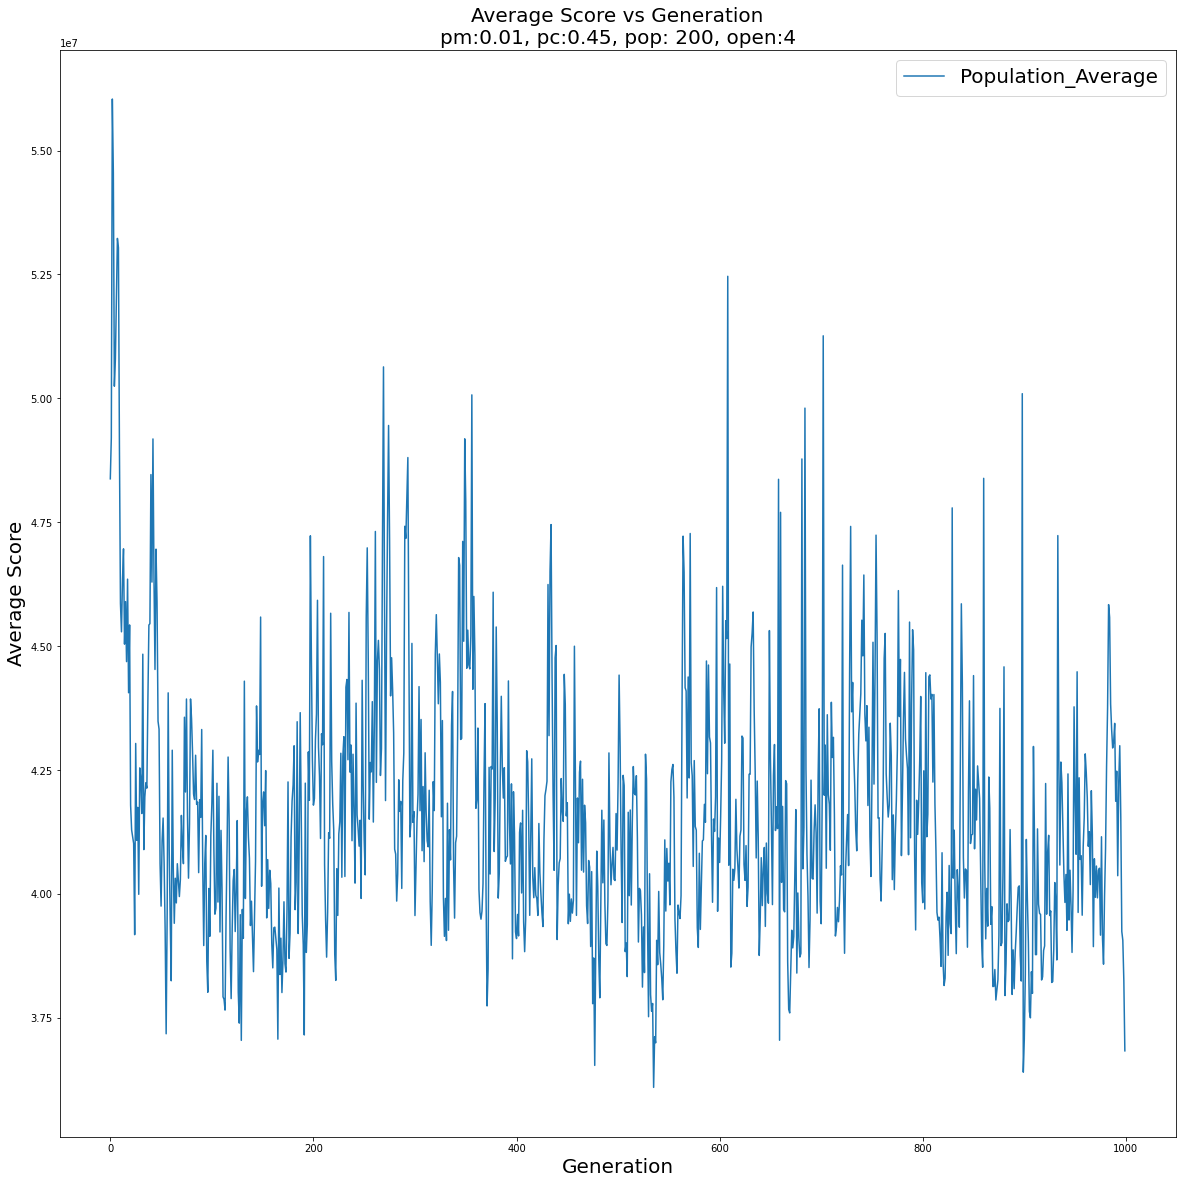

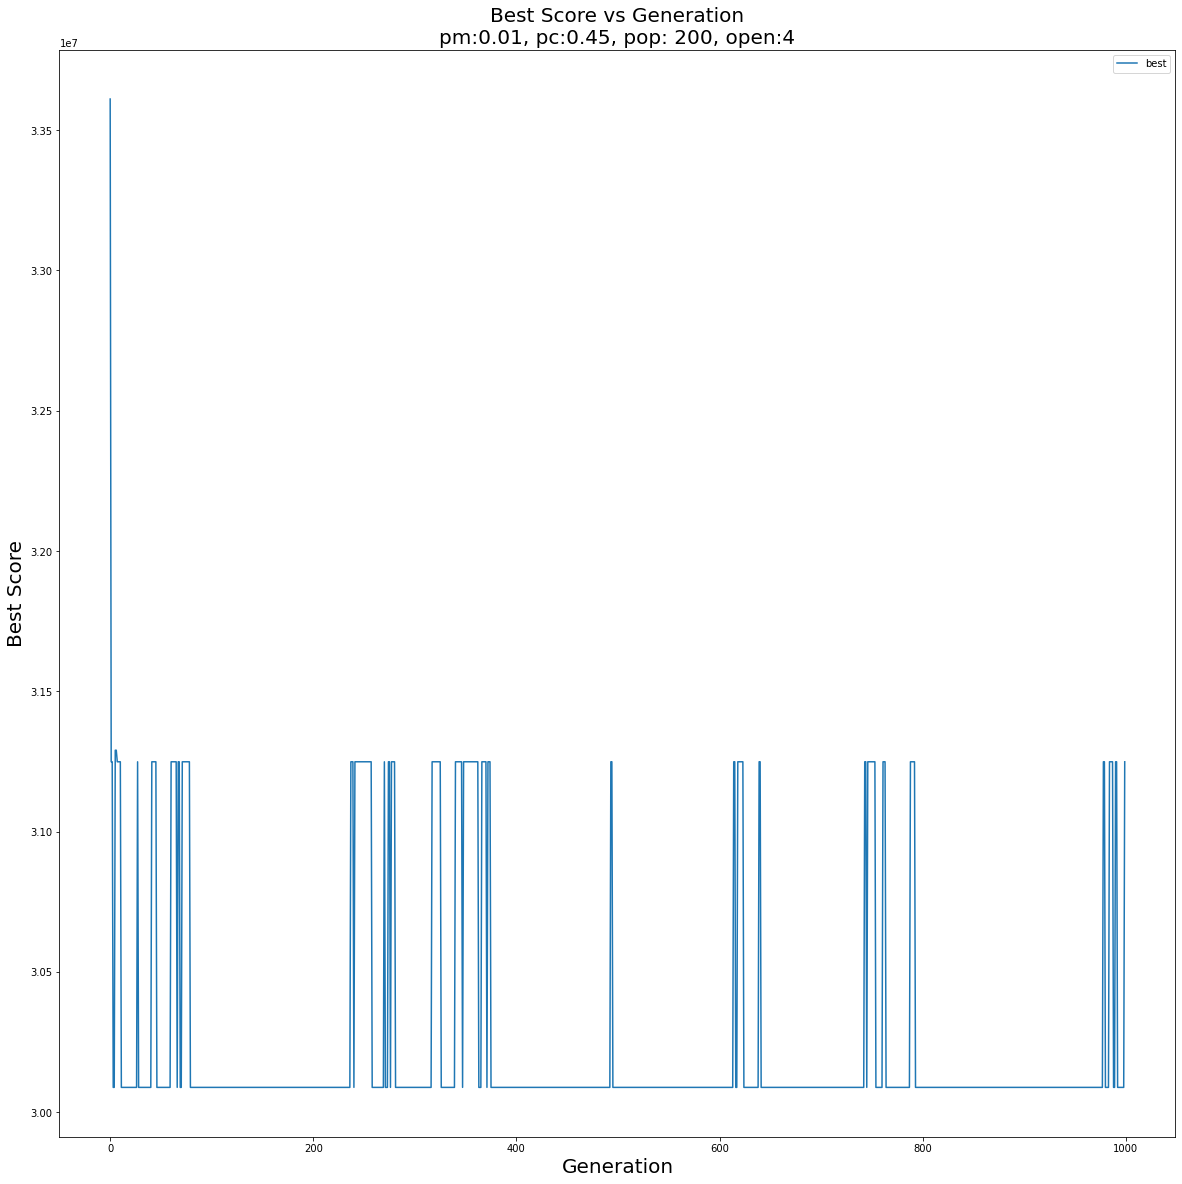


Set up:
pm: 0.01-pc: 0.45-oneprob: None-Nopen: 4-pop: 200
Average Best score: 30248641.73600001 from 1 runs
Best Solution :[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]


In [12]:
# visualize their solution learning ability
gaoptmzr.show_results(figsize=(20, 20),
                     fontdict={"size":20}, prop={"size":20},
                    )



# Display results log:
for Key in hp_dict:
    print("\nSet up:\n{}".format(Key))
    print("Average Best score: {} from {} runs".format(np.mean(hp_dict[Key]['best_score']), len(hp_dict[Key]['best_score'])))
    print("Best Solution :{}".format(hp_dict[Key]['soln'][0])) 


In [13]:
# Testing setting 1 by index
ze = np.zeros(10)
ze[np.random.default_rng().choice([1, 5, 4, 9, 2, 6, 3, 7, 8, 0], 6, replace=False)] = 1
ze

array([1., 1., 1., 1., 0., 0., 1., 0., 1., 0.])

# Solution Testing Cell
> copy the reportes best solution into the list of list solns and run the cell to make sure the 
> reported scores match up to the calculated ones. This basically is a sanity check

In [14]:
# Test a given solution to make sure things are working as expected
solns = [[0.0, 0.0, 0.0, 0, 0, 0.0, 0, 0.0, 0, 0, 0, 0.0, 0, 0, 0.0, 0.0, 0.0, 0, 0, 0, 0.0, 0.0, 0, 0, 1]]

# reported 33305047.277000, 
# 17294281.508
#  1772081 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

scores = gaoptmzr.gaoptmzr.solver.score_population(solns)
idx=0
for i in solns[0]: 
    if i == 1:
        print("Solution Id {}".format(idx))
    idx += 1
print(gaoptmzr.gaoptmzr.solver.dgset.assignments)
print("Calculated: ",scores)

Solution Id 24
{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: [], 13: [], 14: [], 15: [], 16: [], 17: [], 18: [], 19: [], 20: [], 21: [], 22: [], 23: [], 24: []}
Calculated:  {0: 33569041.253}


In [15]:
display(gaoptmzr.gaoptmzr.solver.nodes.nodes)
display(gaoptmzr.gaoptmzr.solver.dgset.dg_df)

,id,demand,penalty,pos-x,pos-y,suppliedPower
0,1,495434,10,35.953747,-83.943975,0.0
1,2,495434,10,35.967477,-83.937751,0.0
2,3,495434,10,36.062503,-83.996649,0.0
3,4,495434,10,35.975097,-83.936355,0.0
4,5,495434,10,35.968580,-83.993414,0.0
5,6,18031,5,35.984883,-83.903327,0.0
6,7,18031,5,35.986606,-83.932197,0.0
7,8,18031,5,35.992759,-83.952804,0.0
8,9,18031,5,35.991716,-84.001613,0.0
9,10,18031,5,35.935312,-83.869820,0.0


,id,output,pos-x,pos-y,rated_power,investment_cost,o&m_cost,excess_penetration_cost_LOW,excess_penetration_cost_MEDIUM,excess_penetration_cost_HIGH,costs,current_output,assignments
0,1.0,1351248.0,35.953747,-83.943975,5000000.0,1.36,0.041,0.680,1.36,2.040,0.0,1351248.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,2.0,1351248.0,35.967477,-83.937751,5000000.0,1.36,0.041,0.680,1.36,2.040,0.0,1351248.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,3.0,1351248.0,36.062503,-83.996649,5000000.0,1.36,0.041,0.680,1.36,2.040,0.0,1351248.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,4.0,1351248.0,35.975097,-83.936355,5000000.0,1.36,0.041,0.680,1.36,2.040,0.0,1351248.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,5.0,1351248.0,35.968580,-83.993414,5000000.0,1.36,0.041,0.680,1.36,2.040,0.0,1351248.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,6.0,270250.0,35.984883,-83.903327,1000000.0,1.72,0.052,0.860,1.72,2.580,0.0,270250.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,7.0,270250.0,35.986606,-83.932197,1000000.0,1.72,0.052,0.860,1.72,2.580,0.0,270250.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,8.0,270250.0,35.992759,-83.952804,1000000.0,1.72,0.052,0.860,1.72,2.580,0.0,270250.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,9.0,270250.0,35.991716,-84.001613,1000000.0,1.72,0.052,0.860,1.72,2.580,0.0,270250.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,10.0,270250.0,35.935312,-83.869820,1000000.0,1.72,0.052,0.860,1.72,2.580,0.0,270250.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [16]:
test_df = pd.DataFrame({
    "a":np.random.default_rng().choice([1, 5, 4, 9, 2, 6, 3, 7, 8, 0], 6, replace=False),
    "b":np.random.default_rng().choice([1, 5, 4, 9, 2, 6, 3, 7, 8, 0], 6, replace=False),
})


print(test_df)


print(test_df.loc[:, "a"].max())

   a  b
0  2  0
1  3  4
2  6  6
3  0  8
4  1  7
5  8  9
8


# References:

* [Genetic Algorithms: John H. Holland, July 1992, Scientific American](https://www.jstor.org/stable/pdf/24939139.pdf?refreqid=excelsior%3A037d6e486556a59706db6b7fb51c5205)

* [Paper_Microgrid_Sim](https://github.com/ILABUTK/Paper_Microgrid_Sim)
* [Simulation-based_optimization](https://en.wikipedia.org/wiki/Simulation-based_optimization)
* [In Situ Operating Room–Based Simulation: A Review](https://www.sciencedirect.com/science/article/pii/S1931720417300028)

In [17]:
a = np.mean([1, 2, 3, 4])
print(a) 
b = [1,2,3,4,5]
print(b[:-1])

2.5
[1, 2, 3, 4]


In [18]:
thtng = np.around(44.55757575, 4)
print(thtng)

44.5576


In [19]:
# test_scores = {0: np.random.default_rng().uniform(1, 100, 1)[0], 
#                1: np.random.default_rng().uniform(1, 100, 1)[0], 
#                2:np.random.default_rng().uniform(1, 100, 1)[0], 
#                3:np.random.default_rng().uniform(1, 100, 1)[0], 
#                4:np.random.default_rng().uniform(1, 100, 1)[0],
#                           }
test_scores = dict(sorted(test_scores.items(), key=lambda x: x[1]))
for idx in test_scores:
    print("idx: ", idx, " score: ", test_scores[idx])

# reversethem to get the style we need
lilend = sorted(list(test_scores.values()), reverse=True)

idxes = list(test_scores.keys())

scores = list(test_scores.values())
print("scores: ", scores)
print("Reversed: ", lilend)
print("indices: ", idxes)
# get the probs

# reverse porbs
rev_dict = {}
for k, rscr in zip(test_scores, lilend):
    rev_dict[k] = rscr
for idx in rev_dict:
    print("idx: ", idx, " score: ", rev_dict[idx])

    
    
scores = list(rev_dict.values())
probss = np.array(scores)/np.sum(scores)
# invprobss = np.array(np.sum(scores) - scores)/np.sum(scores)


print("probs: ", probss)

# print(invprobss)

# get the cum sum
cumsumm = np.cumsum(probss)
# cumsumm = probss
print(cumsumm)


rngNum = np.random.default_rng().uniform(0,1, 1)[0]
print(rngNum)


# get a rng index 
nextn = -1
parent = -np.inf
while parent <= rngNum and nextn < len(idxes):
    nextn += 1
    parent = cumsumm[nextn]
    print("rng: {}, parent: {}, next: {}".format(rngNum, parent, nextn))
if idx == len(idxes):
    next -= 1

print(idxes[nextn])

NameError: name 'test_scores' is not defined